In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')
##Direción de la imagen
PATH = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Rust/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocesamiento de la imagen

Text(0.5, 1.0, 'Gray')

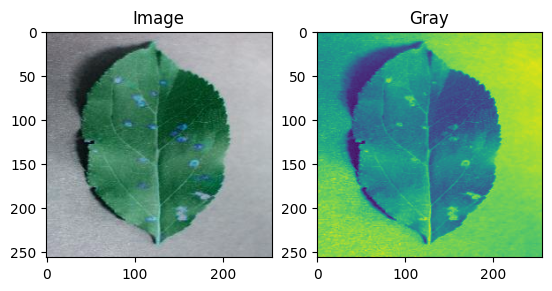

In [8]:

image = cv2.imread(PATH + str(281) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.subplot(121)
plt.imshow(image)
plt.title('Image')

plt.subplot(122)
plt.imshow(img_gray)
plt.title('Gray')

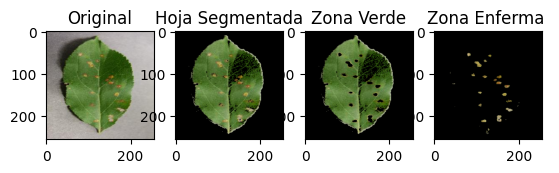

In [26]:
import cv2
import numpy as np

PATH = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Rust/'
image_path = PATH + str(281) + ".jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


def preprocess_image(image):
    # Corrección de la iluminación
    # Método 1: Ecualización del histograma en el canal V
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    # Método 2: Ecualización adaptativa del histograma en el canal V
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    hsv[:,:,2] = clahe.apply(hsv[:,:,2])

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([70, 255, 255])

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Detección de bordes para resaltar los contornos de la hoja
    # Método 1: Detección de bordes de Canny
    edges = cv2.Canny(green_mask, 30, 70)

    # Método 2: Detección de bordes Laplacianos
    laplacian = cv2.Laplacian(green_mask, cv2.CV_8U, ksize=3)

    # Combinar los resultados de los métodos de detección de bordes
    combined_edges = cv2.bitwise_or(edges, laplacian)

    # Crear una máscara para las zonas enfermas (café, amarillo, naranja, negro)
    lower_brown = np.array([0, 50, 50])
    upper_brown = np.array([30, 255, 255])
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)
    brown_segmented = cv2.bitwise_and(image, image, mask=brown_mask)

    # Combinar las imágenes de la zona verde y la zona café para obtener la hoja segmentada
    hoja = cv2.bitwise_or(green_segmented, brown_segmented)

    # Retornar las imágenes preprocesadas
    return green_segmented, brown_segmented, hoja


# Preprocesar la imagen
green_segmented, brown_segmented, hoja = preprocess_image(image)


# Mostrar las imágenes resultantes
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(142)
plt.imshow(cv2.cvtColor(hoja, cv2.COLOR_BGR2RGB))
plt.title('Hoja Segmentada')

plt.subplot(143)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Verde')

plt.subplot(144)
plt.imshow(cv2.cvtColor(brown_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Enferma ')

plt.show()

SCAB

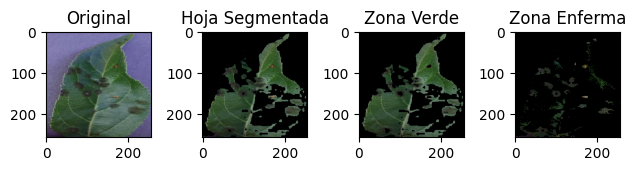

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Convertir la imagen al espacio de color HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Corrección de la iluminación
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv[:, :, 2] = clahe.apply(hsv[:, :, 2])

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([70, 255, 255])

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Definir el rango de color para las zonas enfermas de la roya (café, amarillo, naranja, negro)
    lower_brown = np.array([0, 50, 10])
    upper_brown = np.array([30, 255, 100])
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    lower_yellow = np.array([20, 50, 50])
    upper_yellow = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_orange = np.array([5, 50, 50])
    upper_orange = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv, lower_orange, upper_orange)

    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 60])
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # Combinar las máscaras de las zonas enfermas de la roya
    diseased_mask = cv2.bitwise_or(brown_mask, yellow_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, orange_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, black_mask)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)
    diseased_segmented = cv2.bitwise_and(image, image, mask=diseased_mask)

    # Combinar la zona verde y la zona enferma
    leaf_segmented = cv2.bitwise_or(green_segmented, diseased_segmented)

    # Retornar las imágenes preprocesadas
    return green_segmented, diseased_segmented, leaf_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Scab/542.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented, diseased_segmented, leaf_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(142)
plt.imshow(cv2.cvtColor(leaf_segmented, cv2.COLOR_BGR2RGB))
plt.title('Hoja Segmentada')

plt.subplot(143)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Verde')

plt.subplot(144)
plt.imshow(cv2.cvtColor(diseased_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Enferma')

plt.tight_layout()
plt.show()

Mejorando iluminación

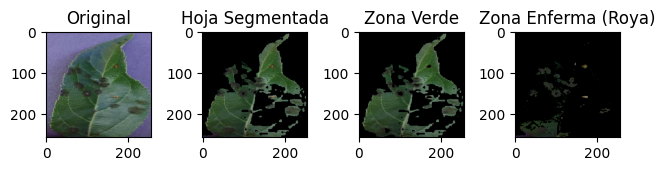

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_correction(image, sigma=50):
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([70, 255, 255])

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Definir el rango de color para las zonas enfermas de la roya (café, amarillo, naranja, negro)
    lower_brown = np.array([0, 50, 10])
    upper_brown = np.array([30, 255, 100])
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    lower_yellow = np.array([20, 50, 50])
    upper_yellow = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_orange = np.array([5, 50, 50])
    upper_orange = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv, lower_orange, upper_orange)

    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 60])
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # Combinar las máscaras de las zonas enfermas de la roya
    diseased_mask = cv2.bitwise_or(brown_mask, yellow_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, orange_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, black_mask)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)
    diseased_segmented = cv2.bitwise_and(image, image, mask=diseased_mask)

    # Combinar la zona verde y la zona enferma
    leaf_segmented = cv2.bitwise_or(green_segmented, diseased_segmented)

    # Retornar las imágenes preprocesadas
    return green_segmented, diseased_segmented, leaf_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Scab/542.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented, diseased_segmented, leaf_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(142)
plt.imshow(cv2.cvtColor(leaf_segmented, cv2.COLOR_BGR2RGB))
plt.title('Hoja Segmentada')

plt.subplot(143)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Verde')

plt.subplot(144)
plt.imshow(cv2.cvtColor(diseased_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona Enferma (Roya)')

plt.tight_layout()
plt.show()

# Intento de mejora del anterior

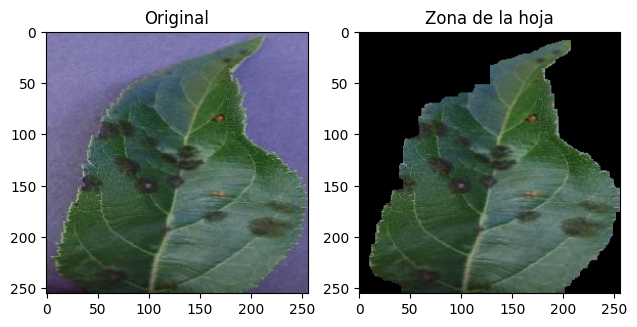

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_correction(image, sigma=50):
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

    # Retornar la imagen segmentada de la zona verde
    return green_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Scab/542.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona de la hoja')

plt.tight_layout()
plt.show()

Sana

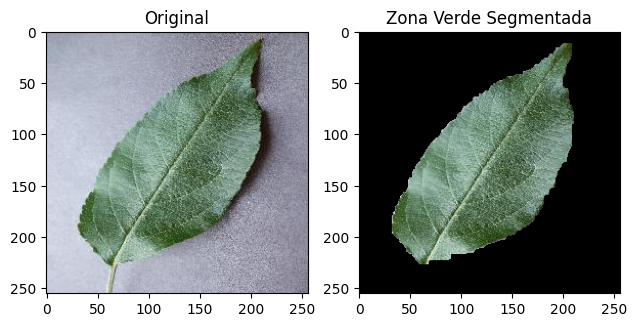

In [42]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_correction(image, sigma=50):
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

    # Retornar la imagen segmentada de la zona verde
    return green_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Healthy/100.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona de la hoja')

plt.tight_layout()
plt.show()

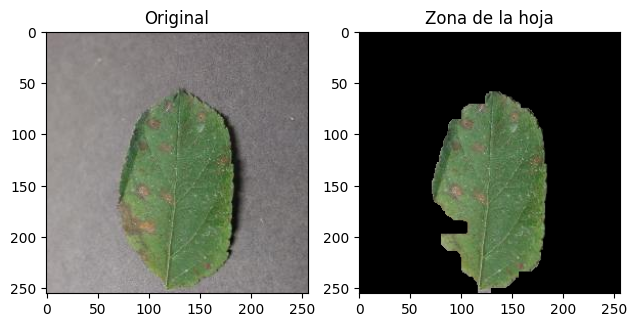

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_correction(image, sigma=50):
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

    # Retornar la imagen segmentada de la zona verde
    return green_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Rust/290.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona de la hoja')

plt.tight_layout()
plt.show()

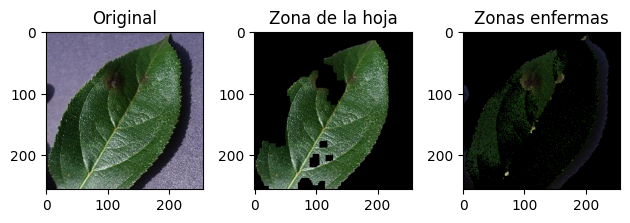

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def retinex_correction(image, sigma=50):
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Definir el rango de color para las zonas enfermas de la roya (café, amarillo, naranja, negro)
    lower_brown = np.array([0, 50, 10])
    upper_brown = np.array([30, 255, 100])
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    lower_yellow = np.array([20, 50, 50])
    upper_yellow = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_orange = np.array([5, 50, 50])
    upper_orange = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv, lower_orange, upper_orange)

    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 60])
    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    # Combinar las máscaras de las zonas enfermas de la roya
    diseased_mask = cv2.bitwise_or(brown_mask, yellow_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, orange_mask)
    diseased_mask = cv2.bitwise_or(diseased_mask, black_mask)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)
    diseased_segmented = cv2.bitwise_and(image, image, mask=diseased_mask)

    # Retornar las imágenes preprocesadas
    return green_segmented, diseased_segmented

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Scab/750.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
green_segmented, diseased_segmented = preprocess_image(image)

# Mostrar las imágenes resultantes
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zona de la hoja')

plt.subplot(133)
plt.imshow(cv2.cvtColor(diseased_segmented, cv2.COLOR_BGR2RGB))
plt.title('Zonas enfermas')

plt.tight_layout()
plt.show()


